In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn
import Plotting as plot
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas import Series, DataFrame
# %matplotlib notebook
plt.style.use('ggplot')

Welcome to ROOTaaS 6.06/08


In [2]:

#---------------------------------------------------------------------
#TEST USING QUANTILE REGRESSION ON EB/EE DATA SEPARATELY AND UNIFIED AFTERWARDS, WITH AND WITHOUT WEIGHTS
#---------------------------------------------------------------------


In [3]:
# Variable you want to correct
ylist = ["R9", "S4", "SigmaIeIe"]#, "EtaWidth", "PhiWidth", "CovarianceIphiIphi",'CovarianceIetaIphi']#, "SigmaRR", 'PhoIso03', 'ChIso03', 'ChIso03worst']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
# Set the quantiles 
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [4]:
# Upload Dataframes:
periods=[1,2,3,4,5]
qr_mc1= quantileRegression("mc")
qr_mc2= quantileRegression("mc")
qr_data= quantileRegression("data")
qr_mc1.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_v2.h5", 0, -1)
qr_mc2.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_v2.h5", 0, -1)
qr_data.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_v2.h5", 0, -1)
dfdata= qr_data.getDF() 

Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_v2.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_v2.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_v2.h5
Selecting events   [ 0 ,  4000000 ]  out of  4000000
number of events: 4000000


In [5]:
qr_mc1.correctAllY(X, ylist, quantiles,EBEE="EB", relativePath= "weights_v2") 
qr_mc2.correctAllY(X, ylist, quantiles,EBEE="EE", relativePath= "weights_v2") 
dfmc1= qr_mc1.getDF() 
dfmc2= qr_mc2.getDF() 
frame2 = [dfmc1, dfmc2] 
data2 = pd.concat(frame2) 
dfmc = data2.reset_index() 

Loading corrected targets from :  correctedTargetsweights_v2_EB.h5
Loading corrected targets from :  correctedTargetsweights_v2_EE.h5


['R9', 'S4', 'SigmaIeIe']
plotting  R9
plotting  S4
plotting  SigmaIeIe


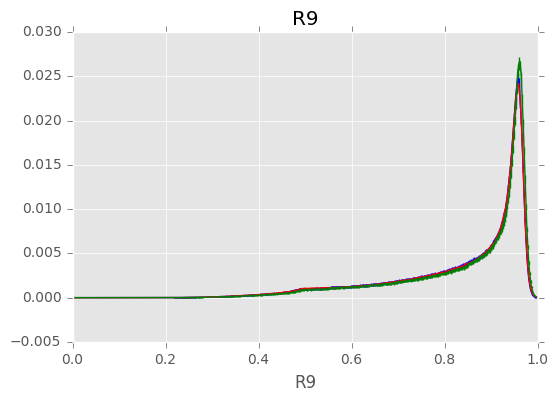

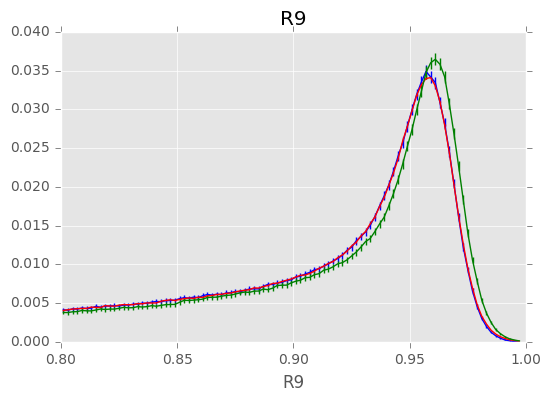

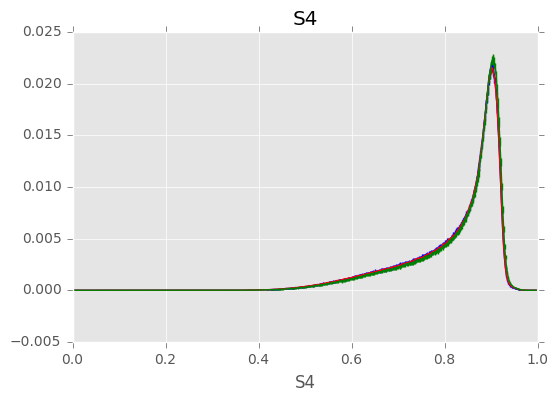

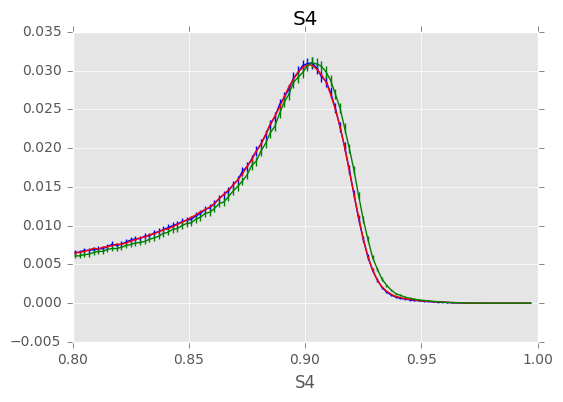

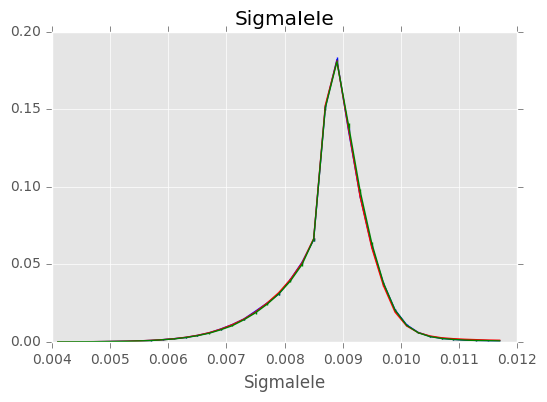

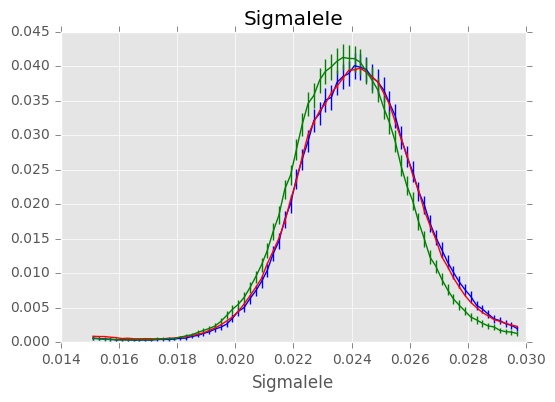

In [6]:
print ylist
for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    if yvar == "R9":
        rv  = np.arange(0.0,1.0,0.002)
        rv2 = np.arange(0.8,1.0,0.002)
    if yvar == "S4":
        rv  = np.arange(0.0,1.0,0.002)
        rv2 = np.arange(0.8,1.0,0.002)
    if yvar == "SigmaIeIe":
        rv = np.arange(0.004,0.012,0.0002)
        rv2 = np.arange(0.015,0.030,0.0002)
    if yvar == "EtaWidth":
        rv = np.arange(0.0,0.05,0.0002)
        rv2 = np.arange(0.005,0.025,0.0002)
    if yvar == "PhiWidth":
        rv = np.arange(0.0,0.2,0.002)
        rv2 = np.arange(0.0,0.05,0.0006)
    if yvar == "CovarianceIphiIphi":
        rv  = np.arange(0.0, 0.02,0.0002)
        rv2 = np.arange(0.02, 0.05,0.0004)
    if yvar == "CovarianceIetaIphi":
        rv = np.arange(-0.0002, 0.0002,0.000002) 
        rv2 = np.arange(-0.00004, 0.00004,0.000001)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    plot.plotHistErr(dfmc[yvar+"_corr"], rv,Weight=dfmc["weight"], Color="b")
    plot.plotHistErr(dfdata[yvar], rv, Color="r", Weight=dfdata["weight"])
    plot.plotHistErr(dfmc[yvar], rv,Weight=dfmc["weight"], Color="g")  
    ax.set_title(yvar)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    plot.plotHistErr(dfmc[yvar+"_corr"], rv2,Weight=dfmc["weight"], Color="b")
    plot.plotHistErr(dfdata[yvar], rv2, Color="r", Weight=dfdata["weight"])
    plot.plotHistErr(dfmc[yvar], rv2,Weight=dfmc["weight"], Color="g")  
    ax.set_title(yvar)

In [7]:
dfmcEB   = dfmc  .query('-1.444 < ScEta & ScEta <1.444') # ('abs(ScEta)<1.444')
dfmcEE   = dfmc  .query('ScEta < -1.57 | ScEta >1.57  ') # ('abs(ScEta)>1.57')
dfdataEB = dfdata.query('-1.444 < ScEta & ScEta <1.444') # ('abs(ScEta)<1.444')
dfdataEE = dfdata.query('ScEta < -1.57 | ScEta >1.57  ') # ('abs(ScEta)>1.57')

hey!
plotting  SigmaIeIe


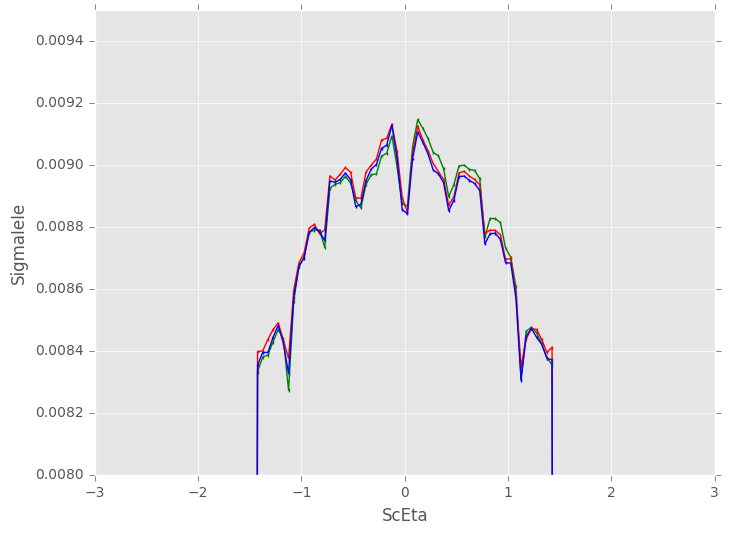

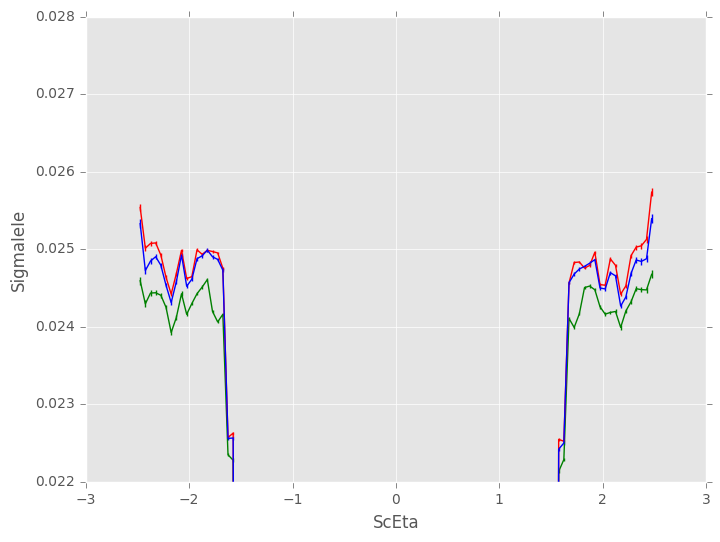

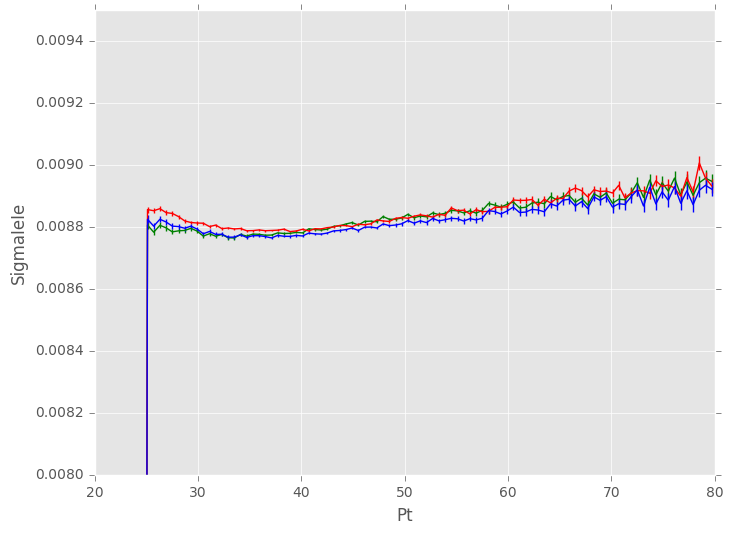

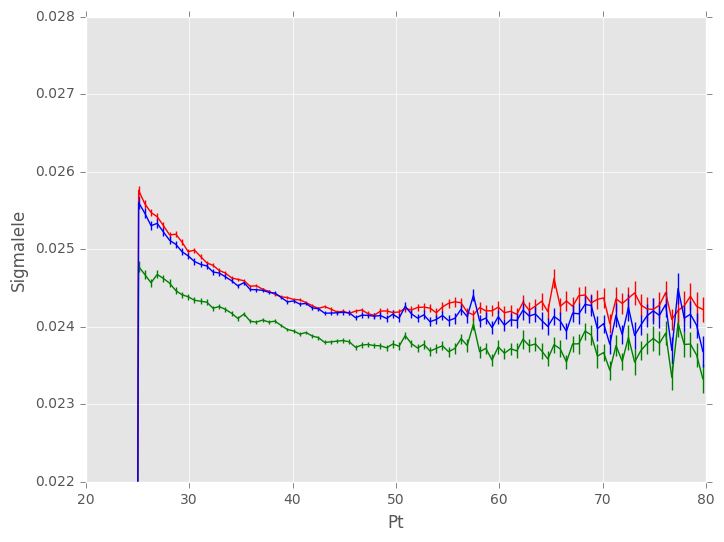

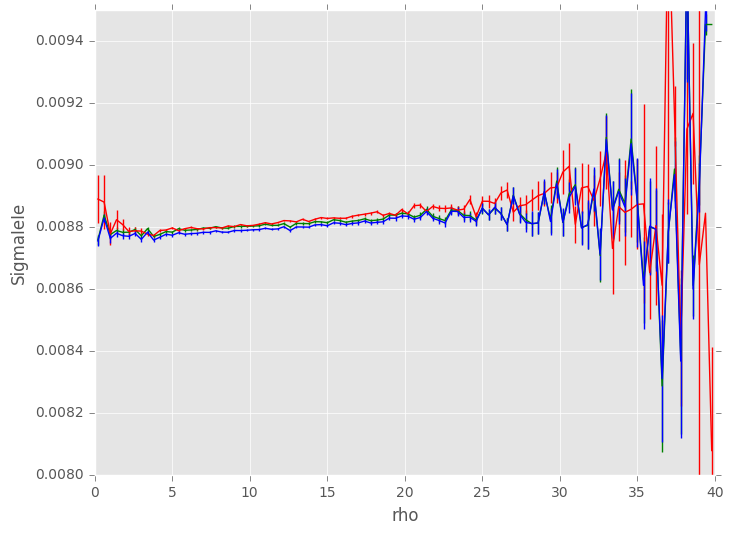

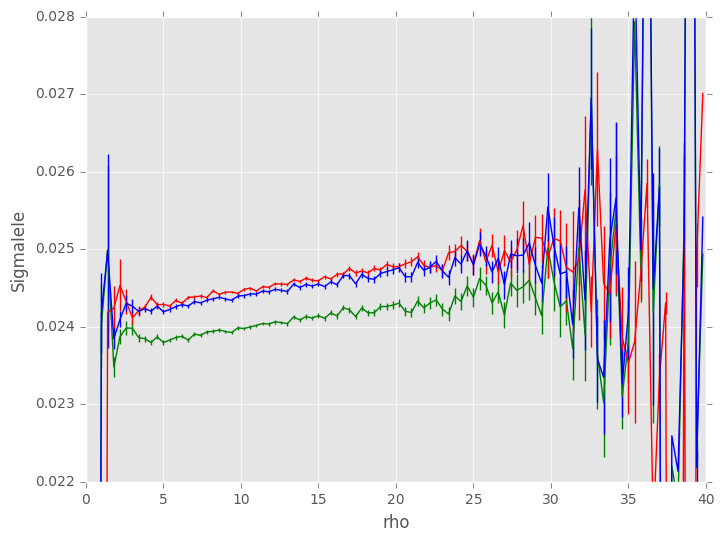

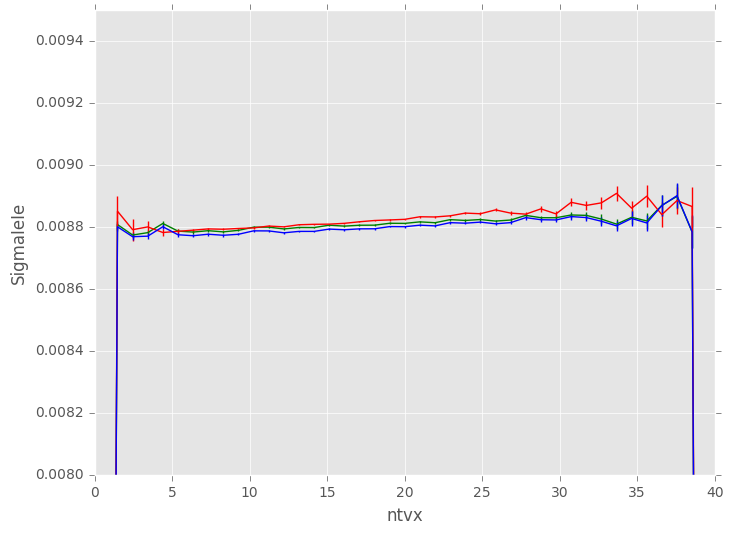

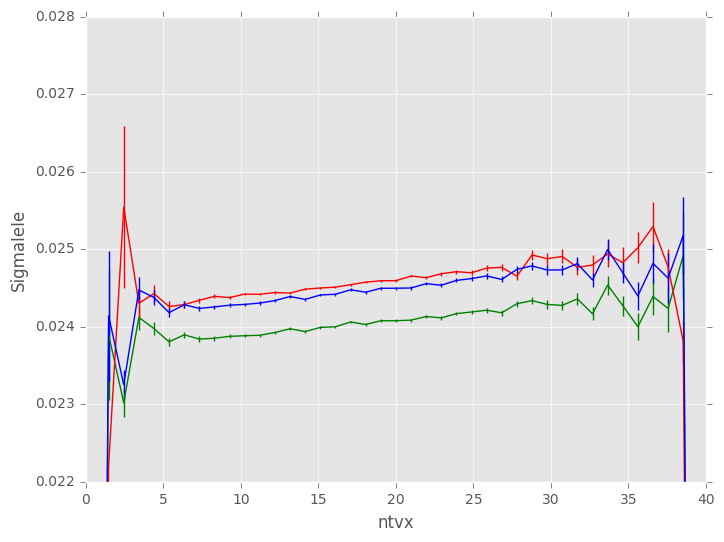

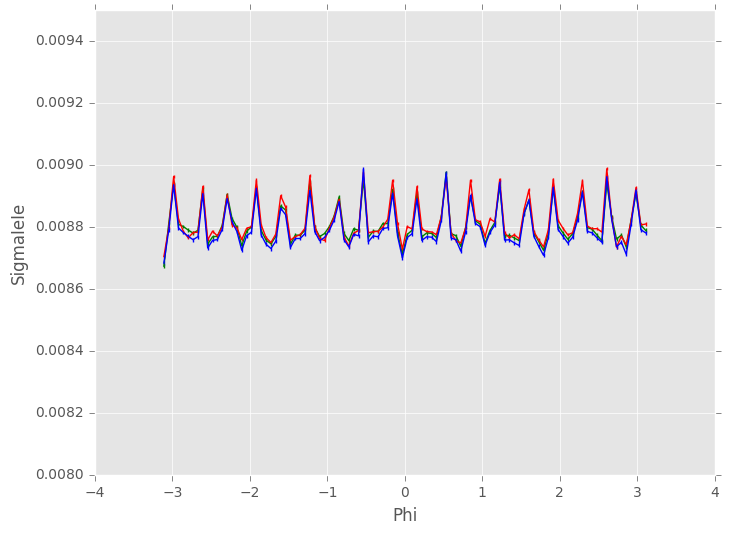

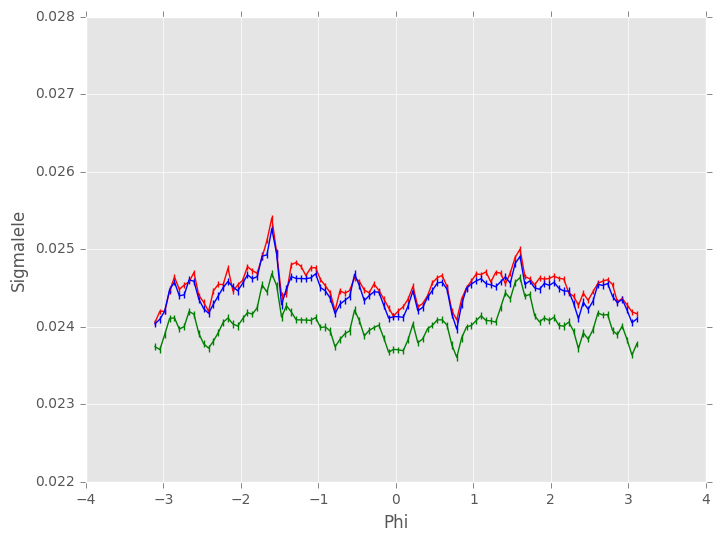

In [8]:
# split profiles in EB/EE (profile meaningless when the values of the variable are very different in the two cases)
for yvar in ["SigmaIeIe"]:
    print "hey!"
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    if yvar == "R9":
        minEB, maxEB = 0.7, 0.9
        minEE, maxEE = 0.7, 0.9
    if yvar == "S4":
        minEB, maxEB = 0.75, 0.9
        minEE, maxEE = 0.75, 0.9
    if yvar == "SigmaIeIe":
        minEB, maxEB = 0.008, 0.0095
        minEE, maxEE = 0.022, 0.028
    if yvar == "EtaWidth":
        minEB, maxEB = 0.006, 0.012
        minEE, maxEE = 0.005, 0.030
    if yvar == "PhiWidth":
        minEB, maxEB = 0.01, 0.06
        minEE, maxEE = 0.02, 0.06
    if yvar == "CovarianceIphiIphi":
        minEB, maxEB = 0.010, 0.016
        minEE, maxEE = 0.025, 0.040
    if yvar == "CovarianceIetaIphi":
        minEB, maxEB = -0.0002, 0.0002
        minEE, maxEE = -0.0002, 0.0002
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('ScEta')
    ax.set_ylabel(yvar)
    plot.Profile(dfmcEB['ScEta']  , dfmcEB[yvar]        ,100,-2.5,2.5,ax,'green',dfmcEB["weight"])
    plot.Profile(dfdataEB['ScEta'], dfdataEB[yvar]      ,100,-2.5,2.5,ax, 'red',dfdataEB["weight"])
    plot.Profile(dfmcEB['ScEta']  , dfmcEB[yvar+'_corr'],100,-2.5,2.5,ax, 'blue',dfmcEB["weight"])

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEE, maxEE)
    ax.set_xlabel('ScEta')
    ax.set_ylabel(yvar)
    plot.Profile(dfmcEE['ScEta']  , dfmcEE[yvar]        ,100,-2.5,2.5,ax,'green',dfmcEE["weight"])
    plot.Profile(dfdataEE['ScEta'], dfdataEE[yvar]      ,100,-2.5,2.5,ax, 'red',dfdataEE["weight"])
    plot.Profile(dfmcEE['ScEta']  , dfmcEE[yvar+'_corr'],100,-2.5,2.5,ax, 'blue',dfmcEE["weight"])

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('Pt')
    ax.set_ylabel(yvar)
    plot.Profile(dfmcEB['Pt']  , dfmcEB[yvar]        ,100,20.,80.,ax, 'green',dfmcEB["weight"])
    plot.Profile(dfdataEB['Pt'], dfdataEB[yvar]      ,100,20.,80.,ax, 'red',dfdataEB["weight"])
    plot.Profile(dfmcEB['Pt']  , dfmcEB[yvar+'_corr'],100,20.,80.,ax, 'blue',dfmcEB["weight"])

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEE, maxEE)
    ax.set_xlabel('Pt')
    ax.set_ylabel(yvar)
    plot.Profile(dfmcEE['Pt']  , dfmcEE[yvar]        ,100,20.,80.,ax, 'green',dfmcEE["weight"])
    plot.Profile(dfdataEE['Pt'], dfdataEE[yvar]      ,100,20.,80.,ax, 'red',dfdataEE["weight"])
    plot.Profile(dfmcEE['Pt']  , dfmcEE[yvar+'_corr'],100,20.,80.,ax, 'blue',dfmcEE["weight"])

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('rho')
    ax.set_ylabel(yvar)
    plot.Profile(dfmcEB['rho']  , dfmcEB[yvar]        ,100,0.,40.,ax, 'green',dfmcEB["weight"])
    plot.Profile(dfdataEB['rho'], dfdataEB[yvar]      ,100,0.,40.,ax, 'red',dfdataEB["weight"])
    plot.Profile(dfmcEB['rho']  , dfmcEB[yvar+'_corr'],100,0.,40.,ax, 'blue',dfmcEB["weight"])

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEE, maxEE)
    ax.set_xlabel('rho')
    ax.set_ylabel(yvar)
    plot.Profile(dfmcEE['rho']  , dfmcEE[yvar]        ,100,0.,40.,ax, 'green',dfmcEE["weight"])
    plot.Profile(dfdataEE['rho'], dfdataEE[yvar]      ,100,0.,40.,ax, 'red',dfdataEE["weight"])
    plot.Profile(dfmcEE['rho']  , dfmcEE[yvar+'_corr'],100,0.,40.,ax, 'blue',dfmcEE["weight"])

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('ntvx')
    ax.set_ylabel(yvar)
    plot.Profile(dfmcEB['nvtx']  , dfmcEB[yvar]        ,41,0.,40.,ax, 'green',dfmcEB["weight"])
    plot.Profile(dfdataEB['nvtx'], dfdataEB[yvar]      ,41,0.,40.,ax, 'red',dfdataEB["weight"])
    plot.Profile(dfmcEB['nvtx']  , dfmcEB[yvar+'_corr'],41,0.,40.,ax, 'blue',dfmcEB["weight"])

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEE, maxEE)
    ax.set_xlabel('ntvx')
    ax.set_ylabel(yvar)
    plot.Profile(dfmcEE['nvtx']  , dfmcEE[yvar]        ,41,0.,40.,ax, 'green',dfmcEE["weight"])
    plot.Profile(dfdataEE['nvtx'], dfdataEE[yvar]      ,41,0.,40.,ax, 'red',dfdataEE["weight"])
    plot.Profile(dfmcEE['nvtx']  , dfmcEE[yvar+'_corr'],41,0.,40.,ax, 'blue',dfmcEE["weight"])

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('Phi')
    ax.set_ylabel(yvar)
    plot.Profile(dfmcEB['Phi']  , dfmcEB[yvar]        ,100,-3.14,3.14,ax, 'green',dfmcEB["weight"])
    plot.Profile(dfdataEB['Phi'], dfdataEB[yvar]      ,100,-3.14,3.14,ax, 'red',dfdataEB["weight"])
    plot.Profile(dfmcEB['Phi']  , dfmcEB[yvar+'_corr'],100,-3.14,3.14,ax, 'blue',dfmcEB["weight"])

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEE, maxEE)
    ax.set_xlabel('Phi')
    ax.set_ylabel(yvar)
    plot.Profile(dfmcEE['Phi']  , dfmcEE[yvar]        ,100,-3.14,3.14,ax, 'green',dfmcEE["weight"])
    plot.Profile(dfdataEE['Phi'], dfdataEE[yvar]      ,100,-3.14,3.14,ax, 'red',dfdataEE["weight"])
    plot.Profile(dfmcEE['Phi']  , dfmcEE[yvar+'_corr'],100,-3.14,3.14,ax, 'blue',dfmcEE["weight"])